## Exploratory data analysis of cold-start dataset
 - We will explore newly created train/test datasets attributes and identify user cold-start problem
 - In particular we will verify that datasets still share common traits as it is prerequisite for proper modeling:
  - compare items unique counts
  - compare distribution of slate sizes
  - compare distribution of slates per user
  - compare history sizes
  - compare click ratios
  - compare categories and subcategories distribution

In [ ]:
try:
    from google.colab import drive

    drive.mount('/content/gdrive')
    BASE_DIR = "/content/gdrive/MyDrive/mlprague2022"
    IN_COLAB = True
except:
    BASE_DIR = ".."
    IN_COLAB = False

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go

Mounted at /content/gdrive


In [ ]:
OUTPUT_DIR = os.path.join(BASE_DIR, "data/mind_cold_start_datasets_basic/")

COLD_START_BEHAVIORS_TRAIN = os.path.join(OUTPUT_DIR, "behaviors_train.tsv")
COLD_START_BEHAVIORS_TEST = os.path.join(OUTPUT_DIR, "behaviors_test.tsv")

In [ ]:
behaviors_train = pd.read_csv(COLD_START_BEHAVIORS_TRAIN, sep="\t")
behaviors_train

,slateid,userid,time,history,impressions,history_all_categories,history_all_subcategories,history_all
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0,tv sports tv news sports lifestyle movies news...,tvnews baseball_mlb tvnews newscrime football_...,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N43353 N8129 N1569 N17686 ...,N39317-0 N20495-0 N42977-0,news news news finance travel news news news n...,newscrime newsus newscrime markets travelnews ...,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N24233,N23877-0 N49712-0 N64174-0 N46821-0 N48017-0 N...,lifestyle lifestyle news sports tv weather spo...,lifestylebuzz lifestylehomeandgarden newsus fo...,N10732 N25792 N7563 N21087 N41087 N5445 N60384...
3,4,U34670,11/11/2019 5:28:05 AM,,N35729-0,tv sports tv finance finance sports lifestyle ...,tv-celebrity baseball_mlb tv-celebrity markets...,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...
4,5,U8125,11/12/2019 4:11:21 PM,,N16096-0 N45389-0 N35850-0 N28495-0 N39317-0 N...,autos travel weather health,autosownership travelnews weathertopstories we...,N10078 N56514 N14904 N33740
...,...,...,...,...,...,...,...,...
147137,156961,U21593,11/14/2019 10:24:05 PM,N58559 N1954 N43353 N14343 N44495 N996 N14441 ...,N64037-0 N42515-0 N56211-0 N46917-0 N63913-0 N...,video news news news news finance video lifest...,science newsus newspolitics newscrime newsworl...,N7432 N58559 N1954 N43353 N14343 N13008 N28833...
147138,156962,U10123,11/13/2019 6:57:04 AM,N57318 N54842 N11037 N44070 N8549 N40509,N58813-0 N4428-0 N32118-0 N22457-0 N9187-0 N45...,finance sports sports news lifestyle music spo...,markets golfvideos golf newsus lifestylehomean...,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...
147139,156963,U75630,11/14/2019 10:58:13 AM,N59704 N12844 N8270 N29510,N34869-0 N38779-0 N25165-0 N34668-0 N46283-1,travel news sports finance foodanddrink travel...,travelnews newscrime football_nfl markets vide...,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...
147140,156964,U44625,11/13/2019 2:57:02 PM,N3164 N53854 N44649 N26398 N43983 N16516 N6373...,N3663-0 N31147-0 N4107-0 N27515-0 N20495-0 N18...,lifestyle weather news finance entertainment t...,lifestylehomeandgarden weathertopstories newsw...,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...


In [ ]:
behaviors_test = pd.read_csv(COLD_START_BEHAVIORS_TEST, sep="\t")
behaviors_test

,slateid,userid,time,history,impressions,history_all_categories,history_all_subcategories,history_all
0,1,U80234,11/15/2019 12:37:50 PM,N46039 N53234 N6616 N63573 N38895,N50775-0,tv news tv news finance autos tv movies entert...,tvnews newsus tv-celebrity newsus finance-comp...,N55189 N46039 N51741 N53234 N11276 N264 N40716...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N33438 N54827 N34775,N36779-0,news travel finance news news finance music ne...,newsus travelnews finance-companies newsscienc...,N58715 N32109 N51180 N33438 N54827 N28488 N611...
2,3,U44190,11/15/2019 9:55:12 AM,N1150 N16233 N53033,N36779-0 N50775-0,sports news tv news lifestyle sports news ente...,football_nfl newscrime tvnews newsus shop-book...,N56253 N1150 N55189 N16233 N61704 N51706 N5303...
3,4,U87380,11/15/2019 3:12:46 PM,N49153 N58518 N7649 N45794 N53033 N29361 N28247,N45057-0,travel news sports sports travel news tv news ...,traveltripideas newsus baseball_mlb football_n...,N63554 N49153 N28678 N23232 N43369 N58518 N444...
4,5,U9444,11/15/2019 8:25:46 AM,,N36779-0,tv sports entertainment sports finance,tv-celebrity football_nfl celebrity golf perso...,N51692 N18285 N26015 N22679 N55556
...,...,...,...,...,...,...,...,...
57853,73147,U67440,11/15/2019 10:27:45 AM,N9897 N1569 N11641 N15542 N13304 N43265 N11863...,N50775-0 N36779-0 N12446-0 N26572-0 N33397-0 N...,travel news foodanddrink news lifestyle video ...,travelnews newsus foodnews newsus lifestyleroy...,N55312 N9897 N55846 N1569 N6956 N28501 N11641 ...
57854,73148,U77536,11/15/2019 8:40:16 PM,N58434 N47020 N7884 N46259 N8024 N47020 N63370,N50775-0 N7993-0 N17513-0,movies tv news foodanddrink finance autos news...,movienews tv-celebrity newsus foodnews finance...,N28691 N8845 N58434 N37120 N22185 N60033 N4702...
57855,73150,U16799,11/15/2019 3:37:06 PM,,N45057-0 N16120-0 N7993-0 N5051-0 N50775-0 N33...,tv tv tv music finance movies,tvnews tv-celebrity tv-celebrity musicnews per...,N40826 N42078 N15670 N15295 N64536 N46845 N52294
57856,73151,U8786,11/15/2019 8:29:26 AM,,N36779-0,lifestyle lifestyle lifestyle autos health hea...,lifestyleroyals lifestyleroyals lifestyleroyal...,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...


### Unique slate count

In [ ]:
behaviors_train.slateid.nunique(), behaviors_test.slateid.nunique()

(147142, 57858)

### Unique user count

In [ ]:
# unique users per dataset
behaviors_train.userid.nunique(), behaviors_test.userid.nunique()

(48106, 41719)

In [ ]:
# do datasets share users?
len(set(behaviors_train.userid.unique()) & set(behaviors_test.userid.unique()))

4913

### Unique arcticles count

In [ ]:
# unique articles per dataset
train_unq_hist_articles = behaviors_train.history.map(lambda x: x.split()).explode().dropna().unique().tolist()
train_uniq_imp_articles = behaviors_train.impressions.map(lambda x: [xx [:-2]for xx in x.split()]).explode().unique().tolist()

train_unq_articles = set(train_unq_hist_articles + train_uniq_imp_articles)

test_unq_hist_articles = behaviors_test.history.map(lambda x: x.split()).explode().dropna().unique().tolist()
test_uniq_imp_articles = behaviors_test.impressions.map(lambda x: [xx [:-2]for xx in x.split()]).explode().unique().tolist()

test_unq_articles = set(test_unq_hist_articles + test_uniq_imp_articles)

In [ ]:
len(train_unq_articles), len(test_unq_articles)

(15753, 8607)

In [ ]:
# do dataset share articles?
len(train_unq_articles & test_unq_articles)

8604

### Unique categories count

In [ ]:
behaviors_train.history_all_categories.map(lambda x: x.split()).explode().nunique(), behaviors_test.history_all_categories.map(lambda x: x.split()).explode().nunique()

(16, 16)

### Unique subcategories count

In [ ]:
behaviors_train.history_all_subcategories.map(lambda x: x.split()).explode().nunique(), behaviors_test.history_all_subcategories.map(lambda x: x.split()).explode().nunique()

(241, 231)

In [ ]:
def item_len(x):
    return len(x.split())

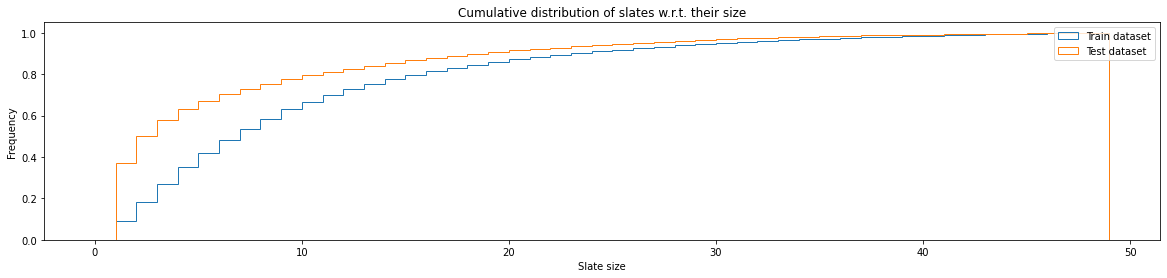

In [ ]:
bins = range(50)
ax = behaviors_train["impressions"].apply(item_len).plot.hist(
    bins=bins, figsize=(20, 4), cumulative=True, density=True, title="Cumulative distribution of slates w.r.t. their size", histtype="step"
)

behaviors_test["impressions"].apply(item_len).plot.hist(
     bins=bins, ax=ax, cumulative=True, density=True, histtype="step"
)


plt.legend(["Train dataset", "Test dataset"])

plt.xlabel("Slate size")
plt.show()

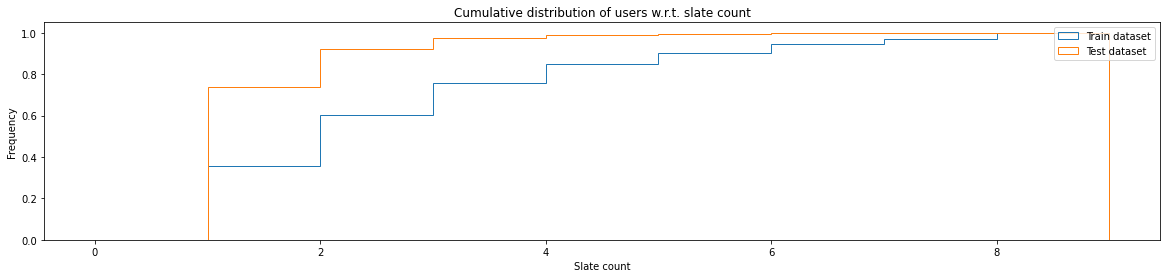

In [ ]:
bins=range(10)

ax = behaviors_train.groupby("userid")["slateid"].count().plot.hist(
    bins=bins, figsize=(20, 4), cumulative=True, density=True, histtype="step", title="Cumulative distribution of users w.r.t. slate count"
)

behaviors_test.groupby("userid")["slateid"].count().plot.hist(
    bins=bins, cumulative=True, density=True, histtype="step"
)

plt.legend(["Train dataset", "Test dataset"])

plt.xlabel("Slate count")
plt.show()

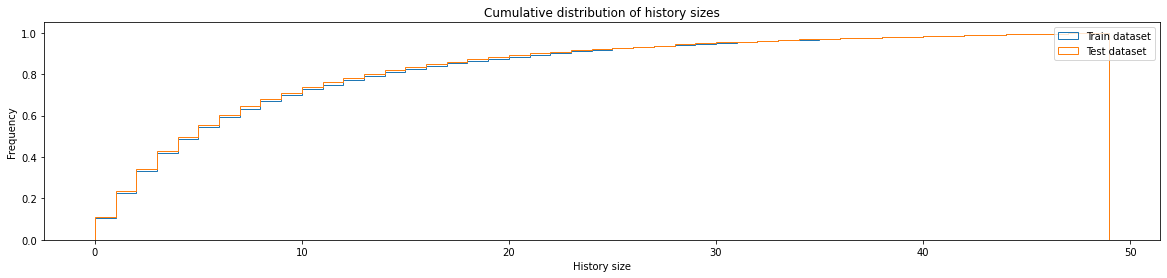

In [ ]:
bins=range(50)

ax = behaviors_train["history"].apply(item_len).plot.hist(
    bins=bins, figsize=(20, 4), cumulative=True, density=True, histtype = "step", title="Cumulative distribution of history sizes"
)

ax = behaviors_test["history"].apply(item_len).plot.hist(
    bins=bins, cumulative=True, density=True, histtype = "step"
)

plt.legend(["Train dataset", "Test dataset"])

plt.xlabel("History size")
plt.show()

In [ ]:
behaviors_train["clicks"] = behaviors_train["impressions"].apply(
    lambda x: " ".join(xx[:-2] for xx in x.split(" ") if xx.endswith("1"))
)

behaviors_test["clicks"] = behaviors_test["impressions"].apply(
    lambda x: " ".join(xx[:-2] for xx in x.split(" ") if xx.endswith("1"))
)

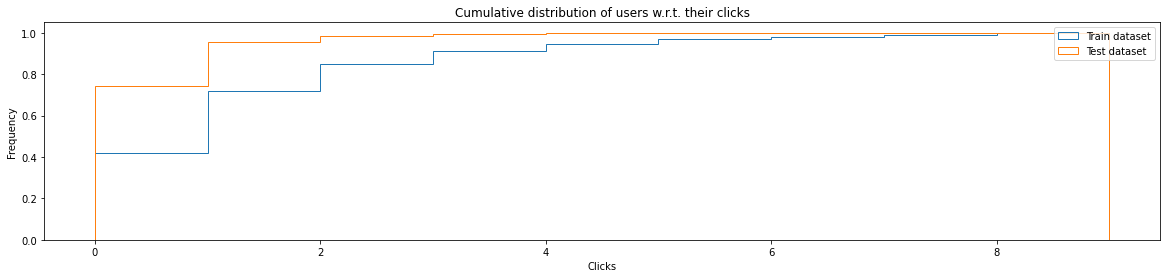

In [ ]:
bins=range(10)

ax = (
    behaviors_train.assign(clicks_cnt=lambda x: x["clicks"].apply(item_len))
    .groupby("userid")["clicks_cnt"]
    .sum()
    .plot.hist(
        bins=bins, figsize=(20, 4), density=True, cumulative=True, histtype="step", title="Cumulative distribution of users w.r.t. their clicks"
    )
)

(
    behaviors_test.assign(clicks_cnt=lambda x: x["clicks"].apply(item_len))
    .groupby("userid")["clicks_cnt"]
    .sum()
    .plot.hist(
        bins=bins, ax=ax, density=True, cumulative=True, histtype="step"
    )
)

plt.legend(["Train dataset", "Test dataset"])

plt.xlabel("Clicks")
plt.show()

In [ ]:
def compute_cat_hist(df, col):
  hist_cat = Counter(
      df.drop_duplicates(["userid"])[col]
      .apply(lambda x: x.split())
      .explode()
  )

  hist_cat = pd.Series(hist_cat).to_frame("cnt")
  hist_cat["prob"] = hist_cat["cnt"] / hist_cat["cnt"].sum()
  hist_cat.sort_values("prob", ascending=False, inplace=True)

  return hist_cat

def plot_cat_hist(df_train, df_test, col, title):
  hist_cat_train = compute_cat_hist(df_train, col)
  hist_cat_test = compute_cat_hist(df_test, col)

  fig = go.Figure(data=[
                        go.Bar(x=hist_cat_train.index, y=hist_cat_train["prob"], name="Train dataset"),
                        go.Bar(x=hist_cat_test.index, y=hist_cat_test["prob"], name="Test dataset")
  ])

  fig.update_layout(title_text=title)

  fig.show()

In [ ]:
plot_cat_hist(behaviors_train, behaviors_test, "history_all_categories", "Distribution of categories among users - test vs train")

In [ ]:
plot_cat_hist(behaviors_train, behaviors_test, "history_all_subcategories", "Distribution of subcategories among users - test vs train")